# Import libraries, functions and read data

In [1]:
import pandas as pd
from wordcloud_functions import *

reviews_df = pd.read_csv('reviews_cleaned_sentiment.csv')
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,length,language,compound,neg,neu,pos
0,25972498,490566386,2019-07-19,77042397,Alex,Great,5.0,en,0.6249,0.0,0.0,1.0
1,42417293,626391422,2020-05-27,343518017,Muhammad Hazwan,Great,5.0,en,0.6249,0.0,0.0,1.0
2,42417293,626488723,2020-05-28,199172803,Nurul,Clean,5.0,en,0.4019,0.0,0.0,1.0
3,3460343,620733537,2020-03-24,115427441,Steven,Great,5.0,en,0.6249,0.0,0.0,1.0
4,21037382,572169987,2019-12-02,149877892,Bill,Clean,5.0,en,0.4019,0.0,0.0,1.0


# Clean Data
- Keep alphanumeric characters
- Remove extra whitespaces
- Remove empty strings
- Lowercase characters
- Lemmatize terms
- Remove stopwords

In [2]:
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

reviews_df['comments'] = reviews_df['comments'].apply(general_cleaning)
reviews_df = reviews_df[reviews_df['comments'] != '']
reviews_df['comments_lem'] = get_lemmatized_text(reviews_df['comments'])
reviews_df['comments_lem_cleaned'] = reviews_df['comments_lem'].apply(remove_stop)

# Split into positive, neutral and negative

In [3]:
positive_df = reviews_df[reviews_df['compound'] > 0]
neutral_df = reviews_df[reviews_df['compound'] == 0]
negative_df = reviews_df[reviews_df['compound'] < 0]

positive_string = " ".join(comment for comment in positive_df["comments_lem_cleaned"])
neutral_string = " ".join(comment for comment in neutral_df["comments_lem_cleaned"])
negative_string = " ".join(comment for comment in negative_df["comments_lem_cleaned"])

In [6]:
print(len(reviews_df))
print(len(positive_df))
print(len(neutral_df))
print(len(negative_df))

62132
57465
3041
1626


In [4]:
# Get length of strings 
print("Length of Postive String: %s" % len(positive_string))
print("Length of Neutral String: %s" % len(neutral_string))
print("Length of Negative String: %s " % len(negative_string))

Length of Postive String: 9229068
Length of Neutral String: 147951
Length of Negative String: 402680 


# Display wordclouds

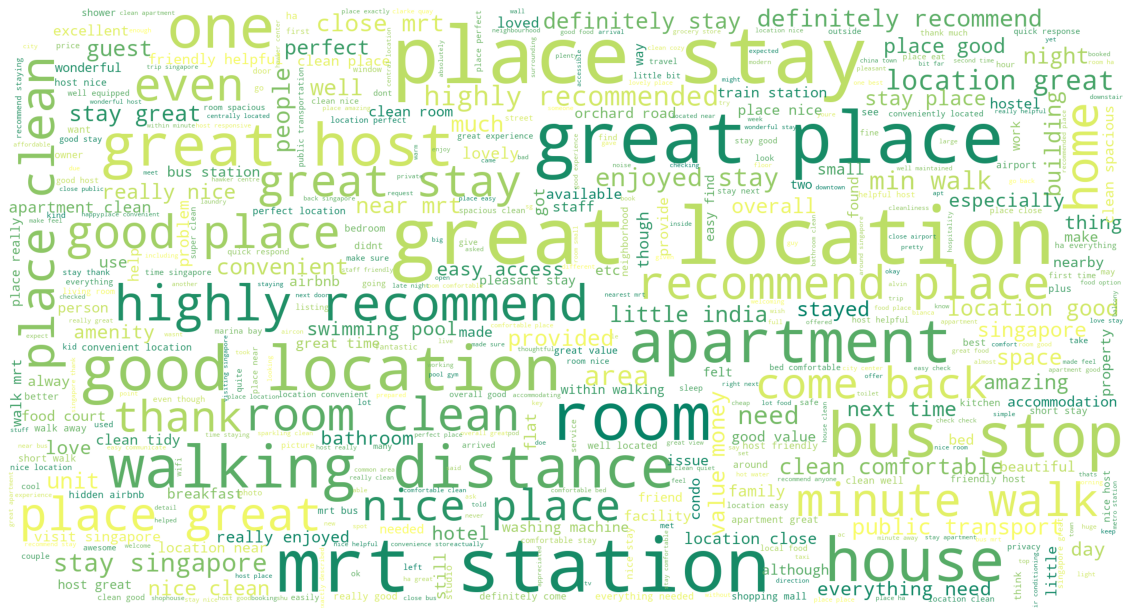

In [5]:
show_wordcloud_positive(positive_string)

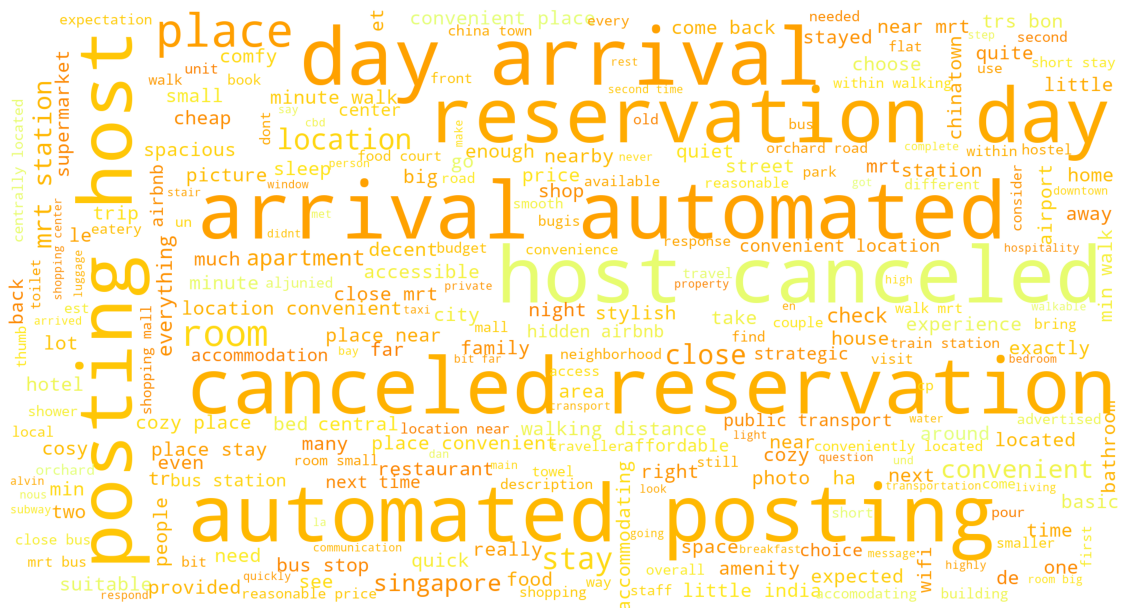

In [6]:
show_wordcloud_neutral(neutral_string)

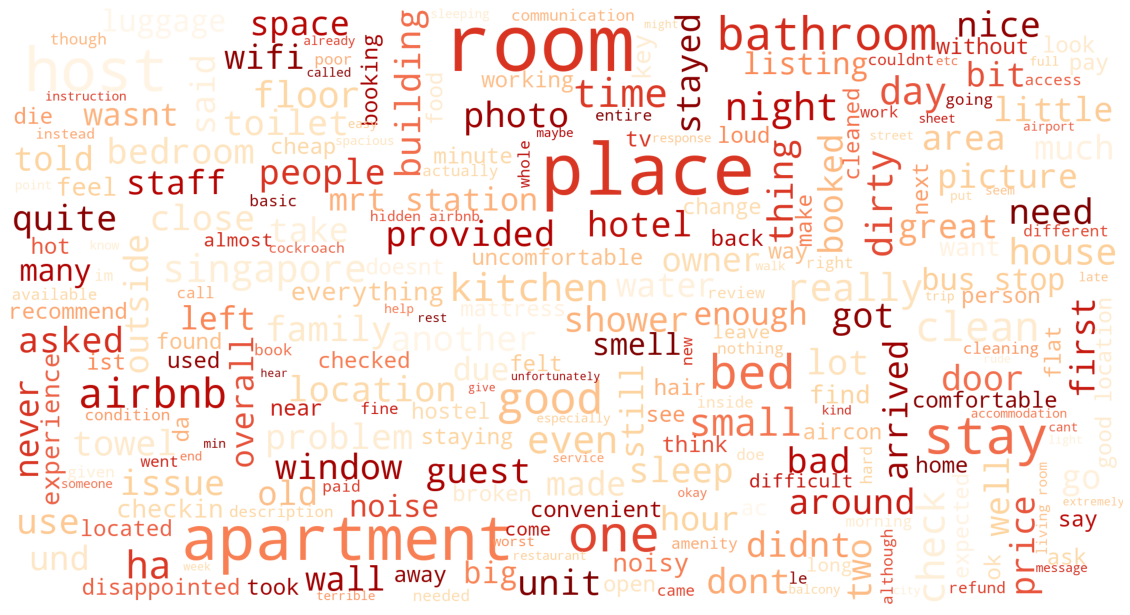

In [7]:
show_wordcloud_negative(negative_string)